# Exploratory Flight data analysis 
## by (Abdullah Alharbi)

## Investigation Overview

> The goal is discover some insights about the dataset after cleaning the data. 

## Dataset Overview

> I Downloded the dataset from the Statistical Computing
Statistical Graphics website. I gathered all of the data for the year of 2018. The website wouldn't allow me to downlod it once, so I downloded each month separatlly. Then I will concat all the data in one master dataframe. The dataset has around 7M observations.

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")


# letting the matplotlib plot all the data points.
plt.rcParams['agg.path.chunksize'] = 10000

# make pandas show all the columns. 
pd.set_option('display.max_columns', None)

In [4]:
# load in the dataset into a pandas dataframe

df = pd.read_csv('master_flights.csv')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

# Visualizations

## The Distribution of flight based on carrier. 

>Southwest Airline(WN) has the most air traffic compared to all of the carriers in the dataset. It has ~1.4 million flight for the year of 2018. Followd by Delta airlines(DL). Virgin Airline is in the bottom of the list, and the reason is becuase it does not fly for many states. 

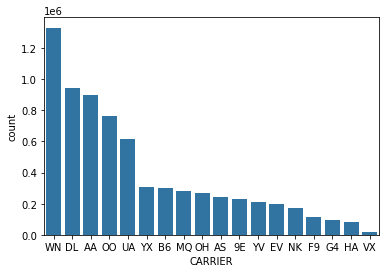

In [5]:
base_color = sb.color_palette()[0]
months_order = df['CARRIER'].value_counts().index

sb.countplot(data=df, x='CARRIER', color = base_color,
            order=months_order);

## The Months Distribution Based on number of flights. 


>  The busiest month is july followed by Aug and Jun, It makes sense becuase people tend to travel alot in the summer season.  

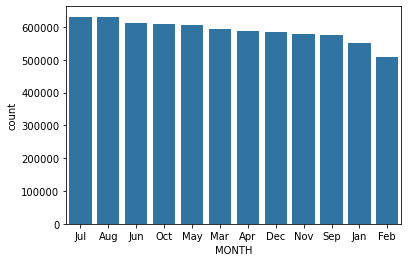

In [6]:
base_color = sb.color_palette()[0]
months_order = df['MONTH'].value_counts().index

sb.countplot(data=df, x='MONTH', color = base_color,
            order=months_order);

## Days Distribution 

> Monday is the busiest day of the week.Since Monday is the start of the week and people tend to travel for business or work. People are less to travel in the weekend, becuase if people are planning to spend the weekend traveling somewhere they probably will travel on Friday which is the next busiest day. 

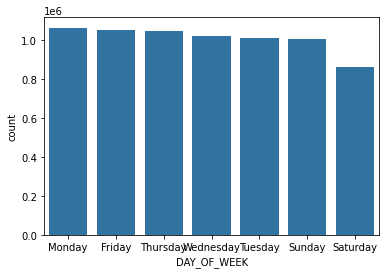

In [7]:
base_color = sb.color_palette()[0]
months_order = df['DAY_OF_WEEK'].value_counts().index

sb.countplot(data=df, x='DAY_OF_WEEK', color = base_color,
            order=months_order);

## Is there any corrlation between departure delay and arrival delay? 

> There is a strong positive corrleation between departure and arrival delay. It makes sense becuase if the departure delayed the arrival will also get dalyed. 

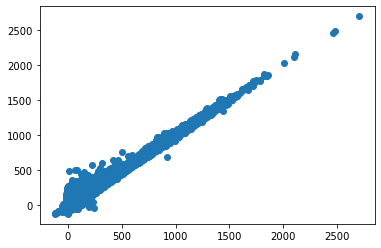

In [8]:
plt.scatter(data=df, x = 'DEP_DELAY', y='ARR_DELAY')

## The monthely Distribution of Departure delay flight.

> Jan, Dec has the most departure delays. Im assuming becuase of the weather conditions since it's Winter time in the U.S.  

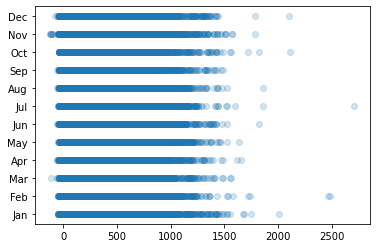

In [9]:
plt.scatter(data=df, x= 'DEP_DELAY', y='MONTH', alpha=1/5);

## The Days Distribution of Delayed Flight.

> Thrusday and Tuesday are best days to travel, Flights on theses two days usually take off on the exact time or even sooner than expected. On the other hand Friday and Monday has the most departure daleys and some times the delay take longer time.

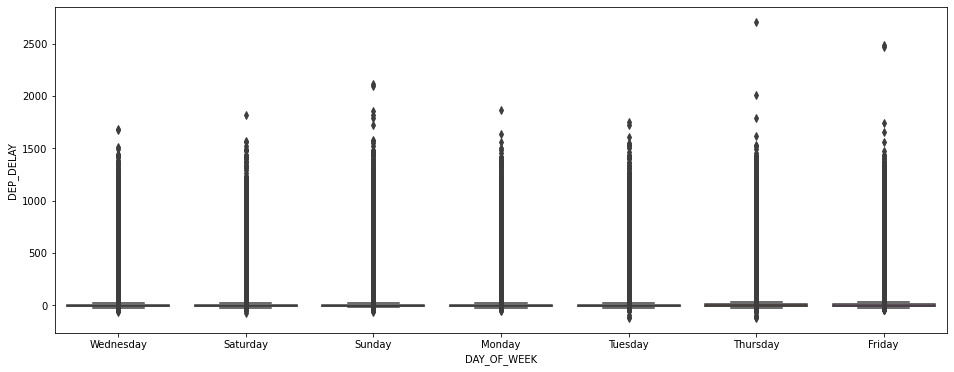

In [27]:
plt.figure(figsize=(16,6))
sb.boxplot(data=df, x = 'DAY_OF_WEEK', y ='DEP_DELAY')

## Comparing carriers and if the flight get delayed or not.

- Endeavor Air(9E) & Mesa Airlines(YV) & Republic Airways(YX)& United Airlines(UA) & PSA Airlines(OH)& Spirit Airlines(NK) &Envoey Air(MQ) & Allegiant Air(G4) &  Forniter Airlines(F9) &Eva Air(EV) & Delta Airlines(DL): 

- They all shares a normal ration between delayed flight and if  the flight get delayed more than 15 min. 

- American Airlines(AA) and Hawaiian airlines:
- It has a delays flight ratio more than the usual, comparing to the other carriers,but it also has a low ratio on the flights that get delayed for more than 15 mins.

- Alaska Airlines(AS): has the highest ratio for the flights that get delayed for more than 15 mins. 

- Skeywest airlines(OO): it has a normal delay ration on the delay flights, and has low ratio on the flights get delayed for more than 15.min


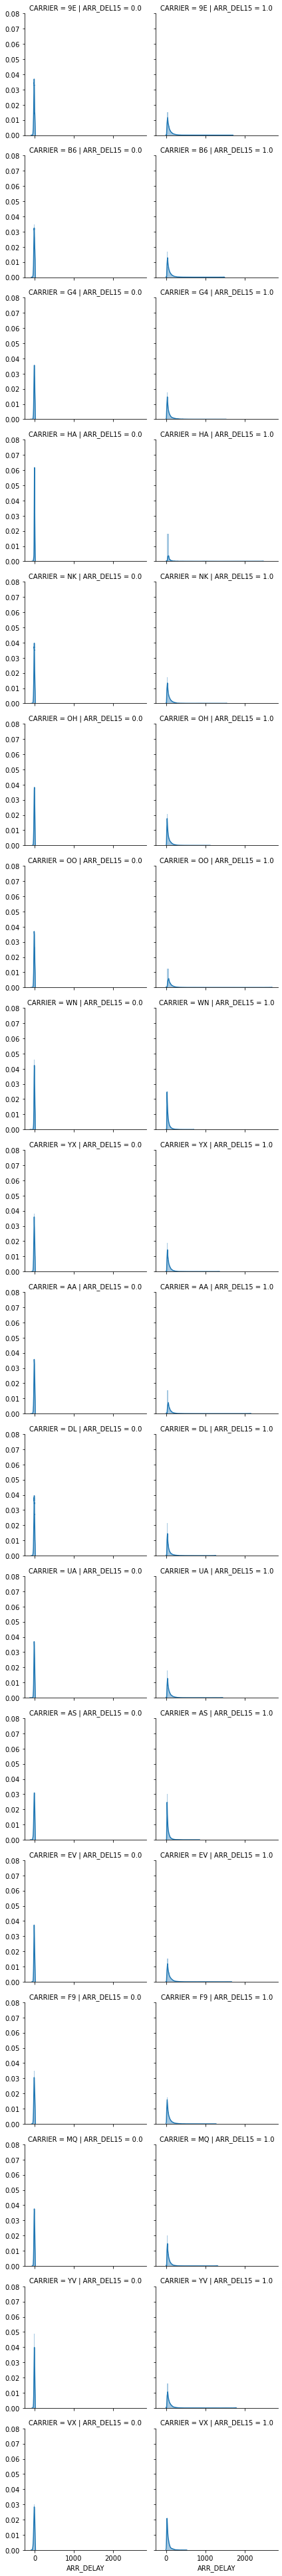

In [11]:
p = sb.FacetGrid(df, col='ARR_DEL15', row='CARRIER')
p = p.map(sb.distplot,'ARR_DELAY')


> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [28]:
! jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 541385 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\dell\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\dell\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\dell\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\dell\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\